In [ ]:
!pip install Prophet

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from google.colab import files
uploaded = files.upload()

take_two_df  = pd.read_csv(
    "take_two_stock.csv")

display(take_two_df.head())
display(take_two_df.tail())

Saving take_two_stock.csv to take_two_stock.csv


,Date,TICKER,Open,High,Low,Close,Volume,Currency
0,2010-01-04,TTWO,10.18,10.60,10.08,10.40,3666383,USD
1,2010-01-05,TTWO,10.38,10.49,10.11,10.47,4442345,USD
2,2010-01-06,TTWO,10.46,10.66,10.33,10.44,2829385,USD
3,2010-01-07,TTWO,10.39,10.43,9.99,10.39,2655430,USD
4,2010-01-08,TTWO,10.33,10.49,10.27,10.42,2144346,USD


,Date,TICKER,Open,High,Low,Close,Volume,Currency
3186,2022-08-29,TTWO,124.54,126.05,121.31,122.90,1848651,USD
3187,2022-08-30,TTWO,124.14,124.51,121.95,123.04,1206325,USD
3188,2022-08-31,TTWO,124.50,125.68,122.24,122.56,1704573,USD
3189,2022-09-01,TTWO,121.00,121.41,118.24,120.72,1359457,USD
3190,2022-09-02,TTWO,121.77,121.77,118.41,118.63,1085915,USD


In [ ]:
prophet_df = take_two_df[['Date', 'Close']]
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvglsh94k/ztmhc17q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvglsh94k/btn5wmz4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9835', 'data', 'file=/tmp/tmpvglsh94k/ztmhc17q.json', 'init=/tmp/tmpvglsh94k/btn5wmz4.json', 'output', 'file=/tmp/tmpvglsh94k/prophet_model3upkwbu0/prophet_model-20230721024854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:48:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:48:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = model.make_future_dataframe(periods= 2000, freq='D')

In [ ]:
forecast = model.predict(future_dates)

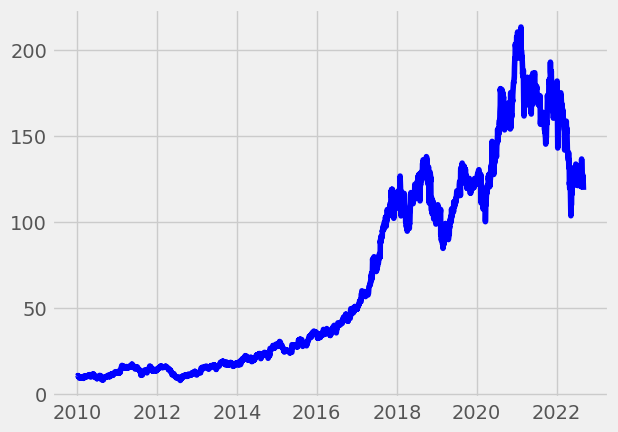

In [ ]:
plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


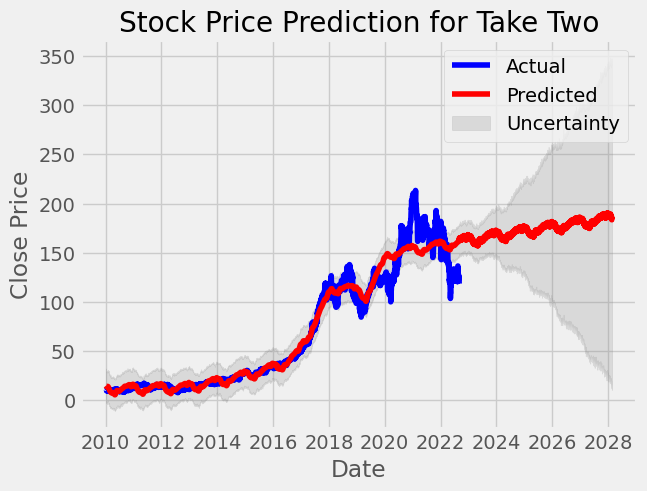

In [10]:

plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted')


plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction for Take Two')
plt.legend()
plt.show()